In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
import plotly.express as px
import plotly.graph_objects as go

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
df = pd.read_csv("/content/zomato.csv")

In [34]:
df.head()

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


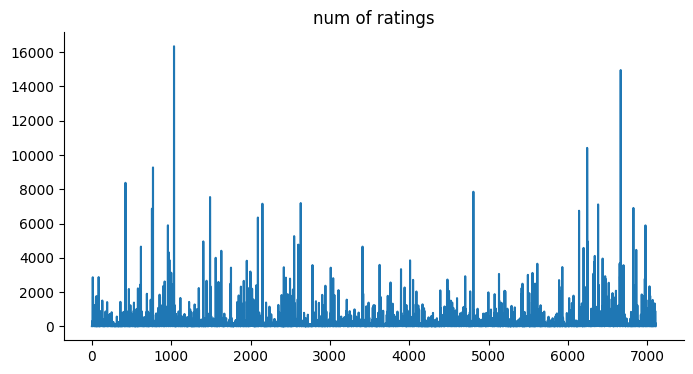

In [35]:

from matplotlib import pyplot as plt
df['num of ratings'].plot(kind='line', figsize=(8, 4), title='num of ratings')
plt.gca().spines[['top', 'right']].set_visible(False)

In [36]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
7100,7100,7100,Zoey's,Cafe,4.3,894,600.0,Yes,No,"Cafe, Italian, Continental, Burger",Bellandur,Sarjapur Road
7101,7101,7101,ZOROY Luxury Chocolate,Dessert Parlor,4.0,68,250.0,Yes,No,Desserts,Brigade Road,Church Street
7102,7102,7102,Zu's Doner Kebaps,"Takeaway, Delivery",3.7,33,350.0,No,No,"Turkish, Fast Food, Biryani, Chinese",Malleshwaram,RT Nagar
7103,7103,7103,Zyara,Casual Dining,3.8,191,650.0,Yes,No,"North Indian, Mughlai, Chinese",Kammanahalli,HBR Layout
7104,7104,7104,Zyksha,Food Truck,3.4,9,200.0,No,No,Fast Food,Bannerghatta Road,South Bangalore


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           7105 non-null   int64  
 1   Unnamed: 0             7105 non-null   int64  
 2   restaurant name        7105 non-null   object 
 3   restaurant type        7105 non-null   object 
 4   rate (out of 5)        7037 non-null   float64
 5   num of ratings         7105 non-null   int64  
 6   avg cost (two people)  7048 non-null   float64
 7   online_order           7105 non-null   object 
 8   table booking          7105 non-null   object 
 9   cuisines type          7105 non-null   object 
 10  area                   7105 non-null   object 
 11  local address          7105 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 666.2+ KB


In [38]:
df.shape

(7105, 12)

In [39]:
df.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
restaurant name,0
restaurant type,0
rate (out of 5),68
num of ratings,0
avg cost (two people),57
online_order,0
table booking,0
cuisines type,0


In [40]:
df.duplicated().sum()

np.int64(0)

In [41]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,rate (out of 5),num of ratings,avg cost (two people)
count,7105.000000,7105.000000,7037.000000,7105.000000,7048.000000
mean,3552.000000,3552.000000,3.514253,188.921042,540.286464
std,2051.181164,2051.181164,0.463249,592.171049,462.902305
min,0.000000,0.000000,1.800000,1.000000,40.000000
25%,1776.000000,1776.000000,3.200000,16.000000,300.000000
50%,3552.000000,3552.000000,3.500000,40.000000,400.000000
75%,5328.000000,5328.000000,3.800000,128.000000,600.000000
max,7104.000000,7104.000000,4.900000,16345.000000,6000.000000


In [42]:
df['rate (out of 5)'].fillna(3.4,inplace=True)
df['avg cost (two people)'].fillna(290,inplace=True)

In [43]:
restaurant_type_counts = df['restaurant type'].value_counts()
restaurant_type_fig = px.bar(restaurant_type_counts, x=restaurant_type_counts.index, y=restaurant_type_counts.values, title='Distribution of Restaurant Types')

restaurant_type_fig.update_layout(
    paper_bgcolor='#4e5363',
    plot_bgcolor='#4e5363',
    font=dict(color='white')
)

restaurant_type_fig.show()

In [44]:
rating_counts = df['rate (out of 5)'].value_counts().sort_index()
rating_fig = px.bar(rating_counts, x=rating_counts.index, y=rating_counts.values, title='Restaurant Ratings Distribution')

rating_fig.update_layout(
    paper_bgcolor='#4e5363',
    plot_bgcolor='#4e5363',
    font=dict(color='white')
)

rating_fig.show()

In [45]:
rating_vs_num_ratings = px.scatter(df, x='num of ratings', y='rate (out of 5)', title='Number of Ratings vs. Average Rating')

rating_vs_num_ratings.update_layout(
    paper_bgcolor='#4e5363',
    plot_bgcolor='#4e5363',
    font=dict(color='white'),
    yaxis=dict(showgrid=False)
)

rating_vs_num_ratings.show()

In [46]:
avg_cost_fig = px.histogram(df, x='avg cost (two people)', title='Average Cost Distribution')

avg_cost_fig.update_layout(
    paper_bgcolor='#4e5363',
    plot_bgcolor='#4e5363',
    font=dict(color='white')
)

avg_cost_fig.show()

In [47]:
online_order_counts = df['online_order'].value_counts()
online_order_fig = px.pie(online_order_counts, names=online_order_counts.index, title='Online Ordering Distribution')

online_order_fig.update_layout(
    paper_bgcolor='#4e5363',
    title_font=dict(color='white')
)

online_order_fig.show()

In [48]:
online_vs_table = px.histogram(df, x='online_order', color='table booking', barmode='group', title='Online Ordering vs. Table Booking')

online_vs_table.update_layout(
    paper_bgcolor='#4e5363',
    plot_bgcolor='#4e5363',
    font=dict(color='white'),

)

online_vs_table.show()

In [49]:
cuisine_counts = df['cuisines type'].str.split(', ', expand=True).stack().value_counts()
cuisine_fig = px.bar(cuisine_counts, x=cuisine_counts.index, y=cuisine_counts.values, title='Popular Cuisines')

cuisine_fig.update_layout(
    paper_bgcolor='#4e5363',
    plot_bgcolor='#4e5363',
    font=dict(color='white'),
    yaxis=dict(showgrid=False)
)

cuisine_fig.show()

In [50]:
area_counts = df['area'].value_counts()
area_fig = px.bar(area_counts, x=area_counts.index, y=area_counts.values, title='Restaurants Distribution by Area')

area_fig.update_layout(
    paper_bgcolor='#4e5363',
    plot_bgcolor='#4e5363',
    font=dict(color='white'),
    yaxis=dict(showgrid=False)
)

area_fig.show()


In [51]:
fig = px.box(df, x='cuisines type', y='avg cost (two people)', title='Average Cost by Cuisine Type')

fig.update_layout(
    paper_bgcolor='#4e5363',
    plot_bgcolor='#4e5363',
    font=dict(color='white'),
    yaxis=dict(showgrid=False),
    width=1200,
    height=1000
)

fig.show()

In [52]:
ratings_vs_cost_corr = px.scatter(df, x='num of ratings', y='avg cost (two people)', title='Number of Ratings vs. Average Cost Correlation')

ratings_vs_cost_corr.update_layout(
    paper_bgcolor='#4e5363',
    plot_bgcolor='#4e5363',
    font=dict(color='white'),
    yaxis=dict(showgrid=False)
)

ratings_vs_cost_corr.show()